In [53]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import pandas as pd
import matplotlib
from matplotlib.colors import LogNorm
from cartopy.util import add_cyclic_point


In [54]:
isotopes = Dataset('climatology/xnapa_isotopes.nc', "a")
precipitation = Dataset('climatology/xnapa_precip.nc', "a")
surface_temperature = Dataset('climatology/xnapa_temp.nc', "a")

In [55]:
lat = isotopes.variables["latitude"][:].data[1:-1]
long = isotopes.variables["longitude"][:].data
t = isotopes.variables["t"][:].data

trash = [626, 0]

In [56]:
do18 = []
precip = []
temp = []
for i in range(len(t)):
    do18.append(isotopes.variables["dO18"][i][0].data[1:-1].reshape(71*96))
    precip.append(precipitation.variables["precip"][i][0].data[1:-1].reshape(71*96))
    temp.append(surface_temperature.variables["temp_1"][i][0].data[1:-1].reshape(71*96))
    
do18_ = pd.DataFrame(np.delete(np.delete(np.asarray(do18), 0, 0), 626, 0)[:1000])
precip_ = pd.DataFrame(np.delete(np.delete(np.asarray(precip), 0, 0), 626, 0)[:1000])
temp_ = pd.DataFrame(np.delete(np.delete(np.asarray(temp), 0, 0), 626, 0)[:1000])

In [57]:
do18 = do18_.mean().values.reshape(71,96)
precip = precip_.mean().values.reshape(71,96)*1000
temp = temp_.mean().values.reshape(71,96)

In [58]:
useless, long = add_cyclic_point(do18, coord=long)

/home/nadine/anaconda3/envs/cartopy/lib/python3.5/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


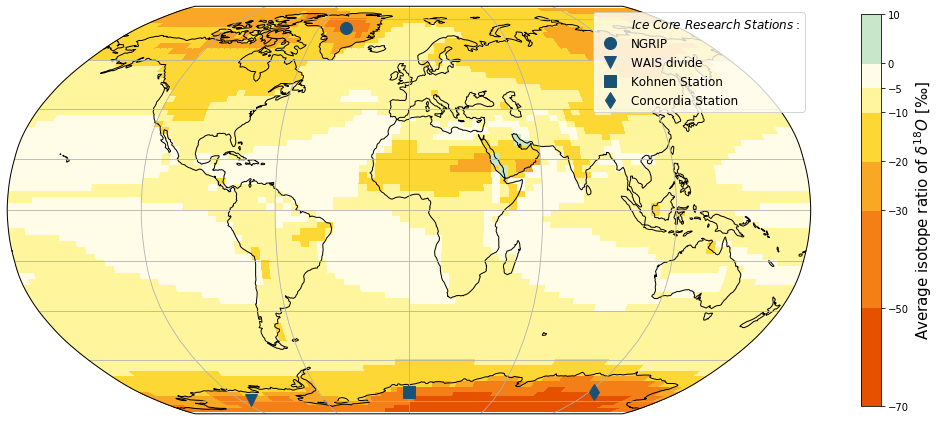

In [63]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())
ax.set_global()
lo, la = np.meshgrid(long, lat)
ax.coastlines()
ax.gridlines()


colors = ["#e65100", "#f57f17", "#f9a825", "#fdd835", "#fff59d", "#fffde7", "#c8e6c9"]
bounds = [-70, -50, -30, -20, -10, -5, 0, 10]
cmap= matplotlib.colors.ListedColormap(colors)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

layer = plt.pcolor(
    lo, la, 
    do18, 
    transform=ccrs.PlateCarree(), 
    cmap=cmap,
    norm=norm
)
                 

cbar = fig.colorbar(
    layer,
    orientation="vertical", 
    shrink=0.6,
    ticks=bounds, 
    spacing='proportional'
)

amin = np.amin(do18)
amax = np.amax(do18)


#cbar.set_label(r"Average precipitation rate [$\frac{g}{m^2\cdot s}$]", rotation=90, fontsize=15)
#cbar.set_label(r"Average surface temperature [$K$]", rotation=90, fontsize=15)
cbar.set_label(r"Average isotope ratio of $\delta^{18}O$ [‰]", rotation=90, fontsize=15)

#ax.plot([-42, 0, -112, 123], [75, -75, -79, -75], ".", markersize=7, transform=ccrs.Geodetic())
#ax.plot([-42, 10, -12, 123], [75, -50, -79, -75], ".", markersize=7, transform=ccrs.Geodetic())
ax.plot([], [], " ", label="$Ice$ $Core$ $Research$ $Stations:$")
ax.plot([-42], [75], "o", color="#1a5276", markersize=12, transform=ccrs.Geodetic(), label="NGRIP")
ax.plot([-112], [-79], "v", color="#1a5276", markersize=12, transform=ccrs.Geodetic(), label="WAIS divide")
ax.plot([0], [-75], "s", color="#1a5276", markersize=12, transform=ccrs.Geodetic(), label="Kohnen Station")
ax.plot([123], [-75], "d", color="#1a5276", markersize=12, transform=ccrs.Geodetic(), label="Concordia Station")


plt.legend(fontsize=12)
plt.savefig("figures/do18_data.png", bbox_inches="tight")
plt.show()

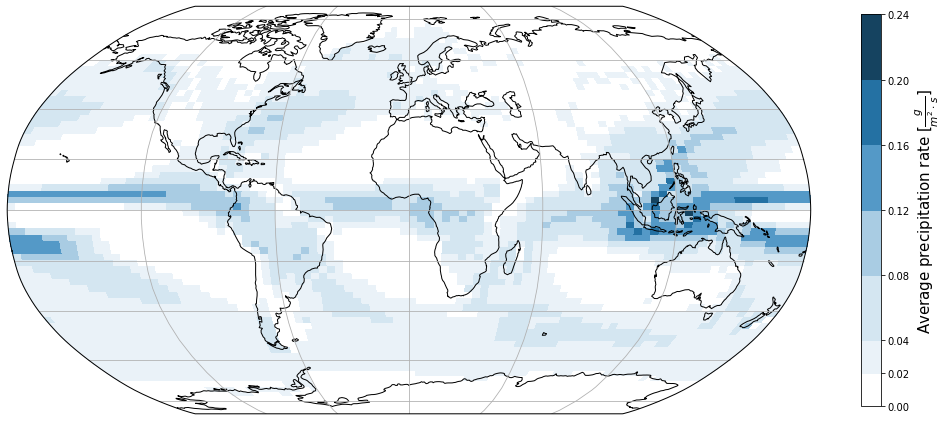

In [7]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())
ax.set_global()
lo, la = np.meshgrid(long, lat)
ax.coastlines()
ax.gridlines()


colors = ["#ffffff", "#eaf2f8", "#d4e6f1", "#a9cce3", "#5499c7", "#2471a3", "#154360"]
bounds = [0, 0.02, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24]
cmap= matplotlib.colors.ListedColormap(colors)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

layer = plt.pcolor(
    lo, la, 
    precip, 
    transform=ccrs.PlateCarree(), 
    cmap=cmap,
    norm=norm
)
                 

cbar = fig.colorbar(
    layer,
    orientation="vertical", 
    shrink=0.6,
    ticks=bounds, 
    spacing='proportional'
)

amin = np.amin(do18)
amax = np.amax(do18)


cbar.set_label(r"Average precipitation rate [$\frac{g}{m^2\cdot s}$]", rotation=90, fontsize=15)

#plt.savefig("figures/precip_data.png")
plt.show()

In [10]:
do18_.shape

(1000, 6816)

In [31]:
do18_[0].values.shape

(1000,)

In [11]:
precip_.shape

(1000, 6816)

In [22]:
do18_.values.transpose().shape

(6816, 1000)

In [38]:
corr_precip = []
for i in range(6816):
    corr_precip.append(np.corrcoef(do18_[i].values, precip_[i].values)[0][1])

In [51]:
corr_temp = []
for i in range(6816):
    corr_temp.append(np.corrcoef(do18_[i].values, temp_[i].values)[0][1])

In [42]:
np.asarray(corr_precip).reshape(71,96)

array([[0.5139933 , 0.52166399, 0.52476584, ..., 0.48396976, 0.50169805,
        0.51285641],
       [0.58579502, 0.59281271, 0.59897075, ..., 0.56112458, 0.56123249,
        0.57082076],
       [0.62710328, 0.62688825, 0.62080986, ..., 0.57105026, 0.56835349,
        0.60326913],
       ...,
       [0.30174166, 0.3177574 , 0.33364504, ..., 0.43324117, 0.37943932,
        0.3221107 ],
       [0.42498235, 0.41362647, 0.42226497, ..., 0.41697109, 0.43310061,
        0.43593436],
       [0.45190213, 0.44594657, 0.44362916, ..., 0.38647527, 0.4254854 ,
        0.45112812]])

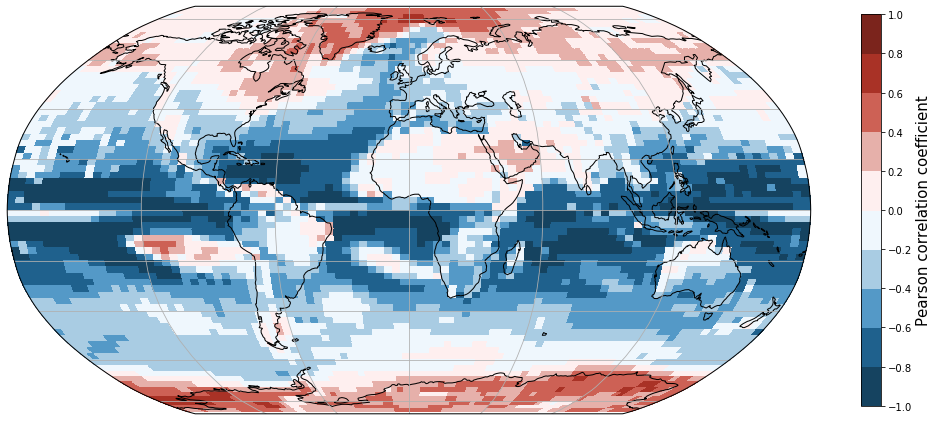

In [50]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())
ax.set_global()
lo, la = np.meshgrid(long, lat)
ax.coastlines()
ax.gridlines()


colors = ["#154360", "#1f618d", "#5499c7", "#a9cce3", "#eff7fd", "#feefef", "#e6b0aa", "#cd6155", "#a93226", "#7b241c"]
bounds = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1] 
cmap= matplotlib.colors.ListedColormap(colors)

norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

layer = plt.pcolor(
    lo, la, 
    np.asarray(corr_precip).reshape(71,96), 
    transform=ccrs.PlateCarree(), 
    cmap=cmap,
    norm=norm,
    vmin=-1,
    vmax=1
)
                 

cbar = fig.colorbar(
    layer,
    orientation="vertical", 
    shrink=0.6,
    ticks=bounds, 
    spacing='proportional'
)



cbar.set_label("Pearson correlation coefficient", rotation=90, fontsize=15)
plt.savefig("figures/corr_precip_do18.png", bbox_inches="tight")
plt.show()

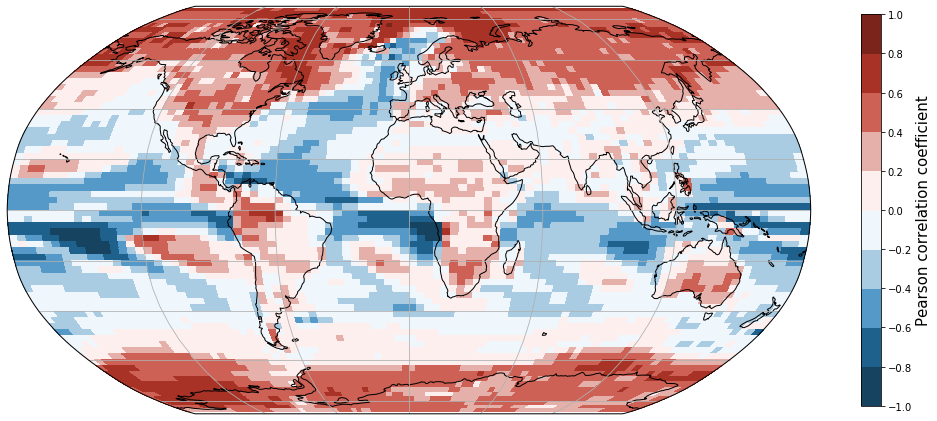

In [52]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())
ax.set_global()
lo, la = np.meshgrid(long, lat)
ax.coastlines()
ax.gridlines()


colors = ["#154360", "#1f618d", "#5499c7", "#a9cce3", "#eff7fd", "#feefef", "#e6b0aa", "#cd6155", "#a93226", "#7b241c"]
bounds = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1] 
cmap= matplotlib.colors.ListedColormap(colors)

norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

layer = plt.pcolor(
    lo, la, 
    np.asarray(corr_temp).reshape(71,96), 
    transform=ccrs.PlateCarree(), 
    cmap=cmap,
    norm=norm,
    vmin=-1,
    vmax=1
)
                 

cbar = fig.colorbar(
    layer,
    orientation="vertical", 
    shrink=0.6,
    ticks=bounds, 
    spacing='proportional'
)



cbar.set_label("Pearson correlation coefficient", rotation=90, fontsize=15)
plt.savefig("figures/corr_temp_do18.png", bbox_inches="tight")
plt.show()